<a href="https://colab.research.google.com/github/Maram00ali/REV4RE/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import necessary Packages**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as score
%matplotlib inline

**Read the data using pandas framework with column names label and message**

In [ ]:
dataset = pd.read_csv('dataset path')

Display first five rows from the dataset

In [ ]:
dataset.head()

,Review,RivewRelevance
0,5 star good app,1
1,A monthly subscription fee. Really?,1
2,Able to customize and decorate a ton of things...,1
3,All I can say is this game is the best!!,1
4,"Although not the best, it better for own creat...",1


**Based on the labels, the number of ham & spam messages are counted and plotted**

In [ ]:
dataset.groupby('RivewRelevance').describe()

Review         \
                count unique   
RivewRelevance                 
0               10352  10349   
1               69045  68658   
2                5535   5535   

                                                                        
                                                              top freq  
RivewRelevance                                                          
0                                                 I am very happy    3  
1                                                 I love this app   10  
2               Hello there... Sometimes it doesn't work prope...    1

In [ ]:
dataset.RivewRelevance.value_counts()

1    69045
0    10352
2     5535
Name: RivewRelevance, dtype: int64

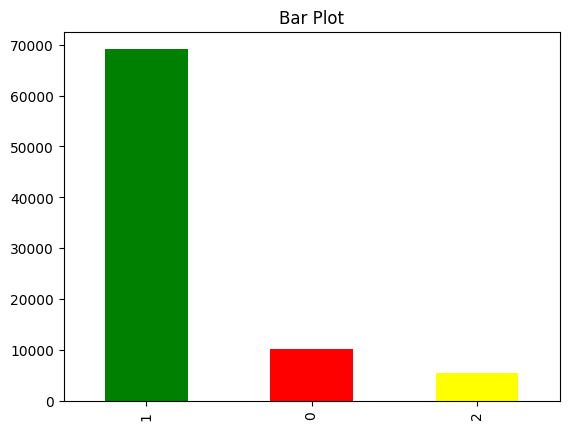

In [ ]:
count_Class=pd.value_counts(dataset["RivewRelevance"], sort= True)
count_Class.plot(kind = 'bar',color = ["green","red","yellow"])
plt.title('Bar Plot')
plt.show()

In [ ]:
#dataset['RivewRelevance'] = dataset['RivewRelevance'].map( {'relevent': '1', 'irrelevent': 0, 'mix' : 2 } )

In [ ]:
dataset.head()

,Review,RivewRelevance
0,5 star good app,1
1,A monthly subscription fee. Really?,1
2,Able to customize and decorate a ton of things...,1
3,All I can say is this game is the best!!,1
4,"Although not the best, it better for own creat...",1


**Put different Labels in separate pandas dataframe inorder to generate WORDCLOUD**

In [ ]:
data_relevent  = dataset[dataset['RivewRelevance'] == 1].copy()
data_irrelevnt = dataset[dataset['RivewRelevance'] == 0].copy()
data_mix = dataset[dataset['RivewRelevance'] == 2].copy()

In [ ]:
!pip install wordcloud==1.8.2.2

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
import wordcloud
from wordcloud import WordCloud
def show_wordcloud(df, title):
    text = ' '.join(df['Review'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)

    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='lightgrey',
                    colormap='viridis', width=800, height=600).generate(text)

    plt.figure(figsize=(10,7), frameon=True)
    plt.imshow(fig_wordcloud)
    plt.axis('off')
    plt.title(title, fontsize=20 )
    plt.show()

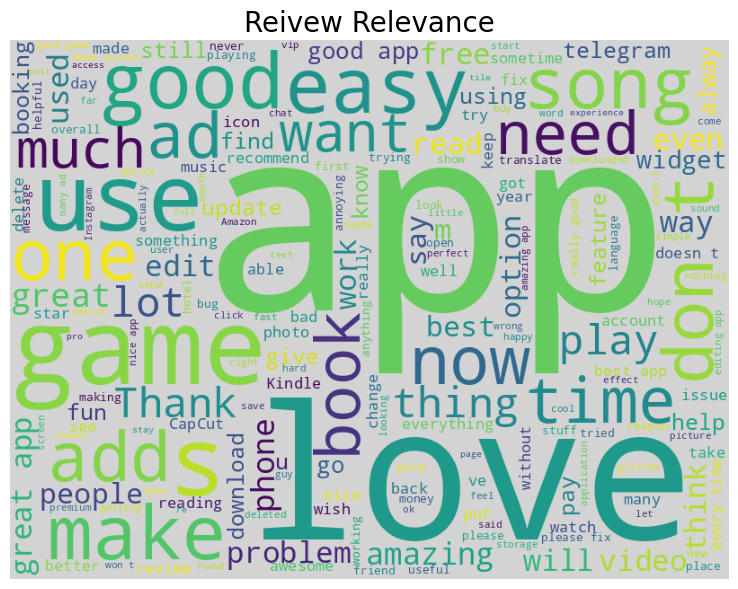

In [ ]:
show_wordcloud(data_relevent, "Reivew Relevance")

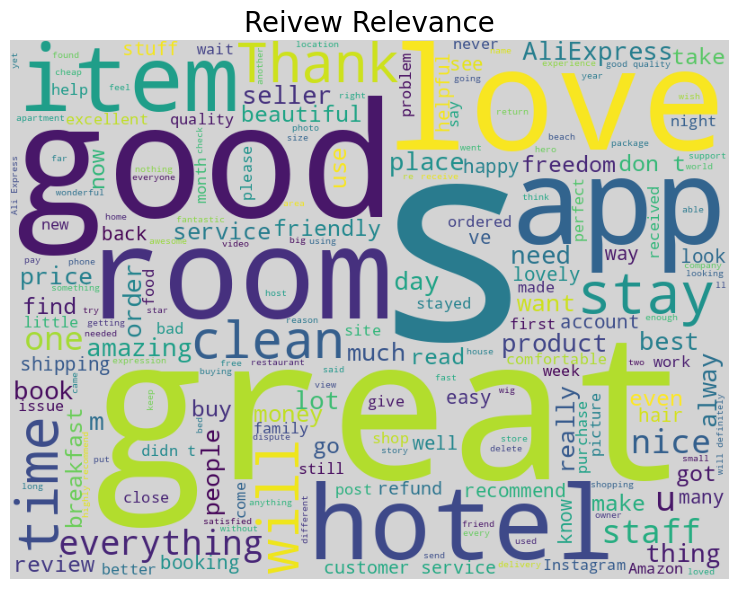

In [ ]:
show_wordcloud(data_irrelevnt, "Reivew Relevance")

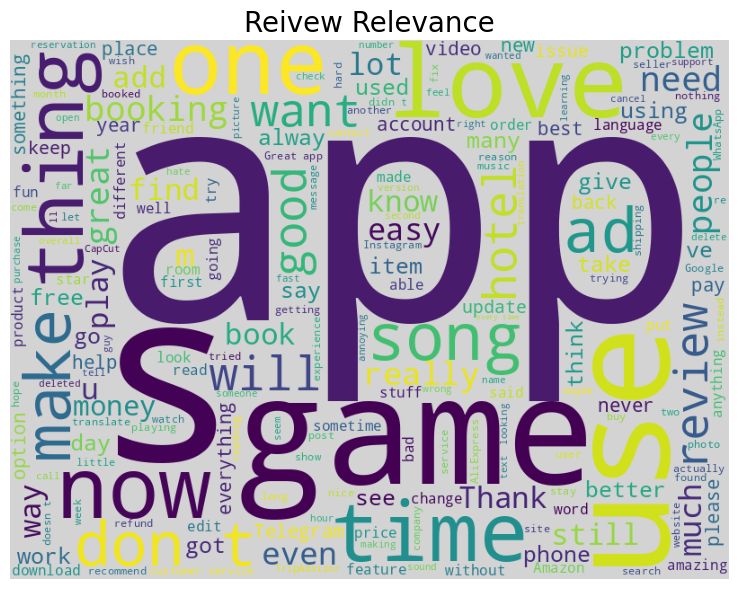

In [ ]:
show_wordcloud(data_mix, "Reivew Relevance")

**Import Necessary for text preprocessing & Training**

In [ ]:
# helps in text preprocessing
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# helps in model building
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.callbacks import EarlyStopping

# split data into train and test set
from sklearn.model_selection import train_test_split

2023-04-25 22:46:58.836368: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-25 22:46:58.966794: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-25 22:46:58.975148: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-25 22:46:58.975183: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

**Dataset split into Train & Test**

In [ ]:
# Importing NLTK Libraries
import nltk
from nltk.corpus import stopwords
from nltk import *

In [ ]:
# Declaring function for text preprocessing

def preprocess_text(main_df):
  df_1 = main_df.copy()

  # remove stopwords
  nltk.download('stopwords')         # Downloading stopwords
  stop = stopwords.words('english')
  df_1['Review'] = df_1['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

  # remove punctuations and convert to lower case
  #df_1['Review'] = df_1['Review'].apply(lambda x: re.sub('[!@#$:).;,?&]', '', x.lower()))

  # remove double spaces
  #df_1['Review'] = df_1['Review'].apply(lambda x: re.sub(' ', ' ', x))

  return df_1

In [ ]:
# Preprocessing training and test data
dataset['Review'] = preprocess_text(dataset)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
dataset

,Review,RivewRelevance
0,5 star good app,1
1,A monthly subscription fee. Really?,1
2,Able customize decorate ton things even free! ...,1
3,All I say game best!!,1
4,"Although best, better creatives.",1
...,...,...
84927,Your app sucks.Im deleting it.I know I'm getti...,1
84928,Your app wait along process downloads west dat...,1
84929,Your customer service unresponsive. I email go...,1
84930,Your new desktop version sucks. I save send in...,1


In [ ]:
X = dataset['Review'].values
y = dataset['RivewRelevance'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

**Text Pre-Processing**

**1. Tokenization**

**2. Text Encoding**

**3. Padding**

In [ ]:
t = Tokenizer()
t.fit_on_texts(X_train)

In [ ]:
encoded_train = t.texts_to_sequences(X_train)
encoded_test = t.texts_to_sequences(X_test)
print(encoded_train[0:2])

[[10, 2, 380, 9501, 3433, 12, 763, 2090, 3433, 691, 1606], [1, 521, 15805, 262, 37, 2314, 91, 26, 8207, 22, 153, 60, 2314, 5, 37, 262, 399, 1092, 218]]


In [ ]:
max_length = 8
padded_train = pad_sequences(encoded_train, maxlen=max_length, padding='post')
padded_test = pad_sequences(encoded_test, maxlen=max_length, padding='post')
print(padded_train)

[[9501 3433   12 ... 3433  691 1606]
 [  60 2314    5 ...  399 1092  218]
 [   3 1221   46 ...  229 2415  662]
 ...
 [  13   17    9 ...    0    0    0]
 [ 246  157  527 ...   86  613  527]
 [   6   69  131 ...    0    0    0]]


**Model is Built with vocabulary size as the input size.**

**Model is compiled and summary generated**

In [ ]:
vocab_size = len(t.word_index) + 1

# define the model
model = Sequential()
model.add(Embedding(vocab_size, 24, input_length=max_length))
model.add(SimpleRNN(24, return_sequences=False))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# summarize the model
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 8, 24)             937584    
                                                                 
 simple_rnn (SimpleRNN)      (None, 24)                1176      
                                                                 
 dense (Dense)               (None, 1)                 25        
                                                                 
Total params: 938,785
Trainable params: 938,785
Non-trainable params: 0
_________________________________________________________________
None
2023-04-25 22:51:09.356021: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-04-25 22:51:09.356051: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed 

**Model is trained and validated for test dataset with 50 epochs.**

**Callback is made at an early stage when the validation loss has its first minimum value.**

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# fit the model
model.fit(x=padded_train,
         y=y_train,
         epochs=100,
         validation_data=(padded_test, y_test), verbose=1,
         callbacks=[early_stop]
         )

Epoch 1/100
2124/2124 [==============================] - 10s 4ms/step - loss: -0.0033 - accuracy: 0.8372 - val_loss: -0.2351 - val_accuracy: 0.8433
Epoch 2/100
2124/2124 [==============================] - 9s 4ms/step - loss: -0.4082 - accuracy: 0.8488 - val_loss: -0.6353 - val_accuracy: 0.8441
Epoch 3/100
2124/2124 [==============================] - 8s 4ms/step - loss: -0.9014 - accuracy: 0.8502 - val_loss: -1.0537 - val_accuracy: 0.8327
Epoch 4/100
2124/2124 [==============================] - 8s 4ms/step - loss: -1.5062 - accuracy: 0.8514 - val_loss: -1.5653 - val_accuracy: 0.8352
Epoch 5/100
2124/2124 [==============================] - 8s 4ms/step - loss: -2.1325 - accuracy: 0.8542 - val_loss: -2.0154 - val_accuracy: 0.8360
Epoch 6/100
2124/2124 [==============================] - 9s 4ms/step - loss: -2.8610 - accuracy: 0.8558 - val_loss: -2.5935 - val_accuracy: 0.8392
Epoch 7/100
2124/2124 [==============================] - 9s 4ms/step - loss: -3.6130 - accuracy: 0.8578 - val_loss: -

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def c_report(y_true, y_pred):
   print("Classification Report")
   print(classification_report(y_true, y_pred))
   acc_sc = accuracy_score(y_true, y_pred)
   print("Accuracy : "+ str(acc_sc))
   return acc_sc

def plot_confusion_matrix(y_true, y_pred):
   mtx = confusion_matrix(y_true, y_pred)
   sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5,
               cmap="Blues", cbar=False)
   plt.ylabel('True label')
   plt.xlabel('Predicted label')

**Model Predicted for test dataset.**

**Classification report and Confusion Matrix generated**

In [ ]:
preds = (model.predict(padded_test) > 0.5).astype("int32")

531/531 [==============================] - 1s 1ms/step


In [ ]:
c_report(y_test, preds)

Classification Report
              precision    recall  f1-score   support

           0       0.43      0.35      0.39      2108
           1       0.85      0.94      0.89     13747
           2       0.00      0.00      0.00      1132

    accuracy                           0.81     16987
   macro avg       0.43      0.43      0.43     16987
weighted avg       0.74      0.81      0.77     16987

Accuracy : 0.805321716606817
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` paramet

0.805321716606817

In [ ]:
# Making the Confusion Matrix
#RNN
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, preds)
print(cm)

[[  738  1370     0]
 [  805 12942     0]
 [  159   973     0]]


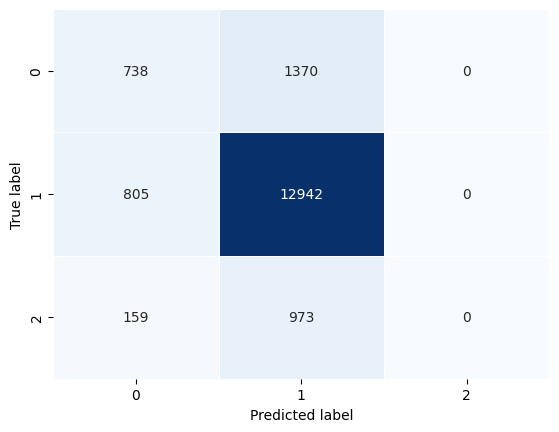

In [ ]:
plot_confusion_matrix(y_test, preds)

**Save the model and the tokenizer (picle package helps us to save the tokenizer to use it on new messages)**

In [ ]:
model.save("ReviewRelevence_model")

INFO:tensorflow:Assets written to: ReviewRelevence_model/assets


In [ ]:
import pickle
with open('ReviewRelevence_model/tokenizer.pkl', 'wb') as output:
   pickle.dump(t, output, pickle.HIGHEST_PROTOCOL)

**Load the model and the tokenizer and predict whether the new message is a spam / ham.**

In [ ]:
import tensorflow as tf

s_model = tf.keras.models.load_model("ReviewRelevence_model")
with open('ReviewRelevence_model/tokenizer.pkl', 'rb') as input:
    tokenizer = pickle.load(input)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

sms = ["Lottery won. You are given a free credit card offer with no emi for first month. call 7654437862 to claim your offer"]
#sms = ["hello! how are you? im visiting mom next week"]
sms_proc = t.texts_to_sequences(sms)
sms_proc = pad_sequences(sms_proc, maxlen=max_length, padding='post')
pred = (model.predict(sms_proc)>0.5).astype("int32").item()
print(pred)

1/1 [==============================] - 0s 85ms/step
1


The sms "we offer a free loan. Call 9998846756 to avail the free loan" is predicted as spam with label 1. This is done based on the common words seen in spam wordcloud like offer, free, call. The Prediction accuracy is 98.3% as in classification report generated.

# ***THANK YOU***


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=378be7ce-053e-4e53-a8d7-d43f011c835b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>